In [ ]:
# from data_downloader import download_dataset
# # URL of the SUSY dataset
# url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz'

# # Directory to save the dataset
# directory = 'data'

# # Path to save the downloaded file
# compressed_file_name = 'SUSY.csv.gz'
# uncompressed_file_name = 'SUSY.csv'

# download_dataset(directory, url, compressed_file_name, uncompressed_file_name)

In [54]:
from data_datasets import higgs,susy,cod_rna
N = 10000
data = "susy"
# data = "higgs"
# data = "cod_rna"
####################

if data == "higgs":
    X_train, X_test, y_train, y_test = higgs(N)
elif data == "susy":
    X_train, X_test, y_train, y_test = susy(N)
elif data == "cod_rna":
    X_train, X_test, y_train, y_test = cod_rna(N)

print("\nDataset:", data)
print("--------\nShape train data:", X_train.shape)
print("Shape test data:", X_test.shape)


Dataset: susy
--------
Shape train data: (10000, 18)
Shape test data: (10000, 18)


## KRR without Preconditioning

In [49]:
import numpy as np
from pkrr import PKRR
from math import *

mu = 1e-4
gamma = np.sqrt(1./6)/1000


model1 = PKRR(mu=mu, gamma=gamma,tolerence=1e-5)
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

model1.fit(X_train=X_train, y_train=y_train)
print(model1.report)

Training is done in 224 iteration with CG-method. Precondition: without precondition


## KRR with a Preconditioner

Training is done in 2 iteration with CG-method. Precondition: uniform


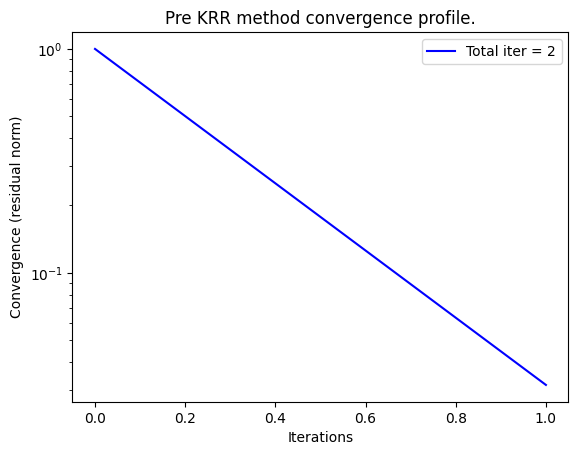

In [65]:

prec = "uniform"
rank = 10

mu = 1e-4
gamma = 1000

import matplotlib.pyplot as plt
from pkrr import PKRR
model = PKRR(mu=mu, gamma=gamma, tolerence=1e-5, prec=prec, rank=rank)

model.fit(X_train=X_train, y_train=y_train)
print(model.report)
plt.title('Pre KRR method convergence profile.')
plt.ylabel('Convergence (residual norm)')
plt.xlabel('Iterations')

m_res = model.residuals
plt.semilogy(range(len(m_res)), m_res, 'b-')
plt.legend(['Total iter = ' + str(len(m_res))])
plt.show()